In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

***Exploratory Data Analysis (EDA)***

In [122]:
df = pd.read_csv("dataset.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [124]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [125]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

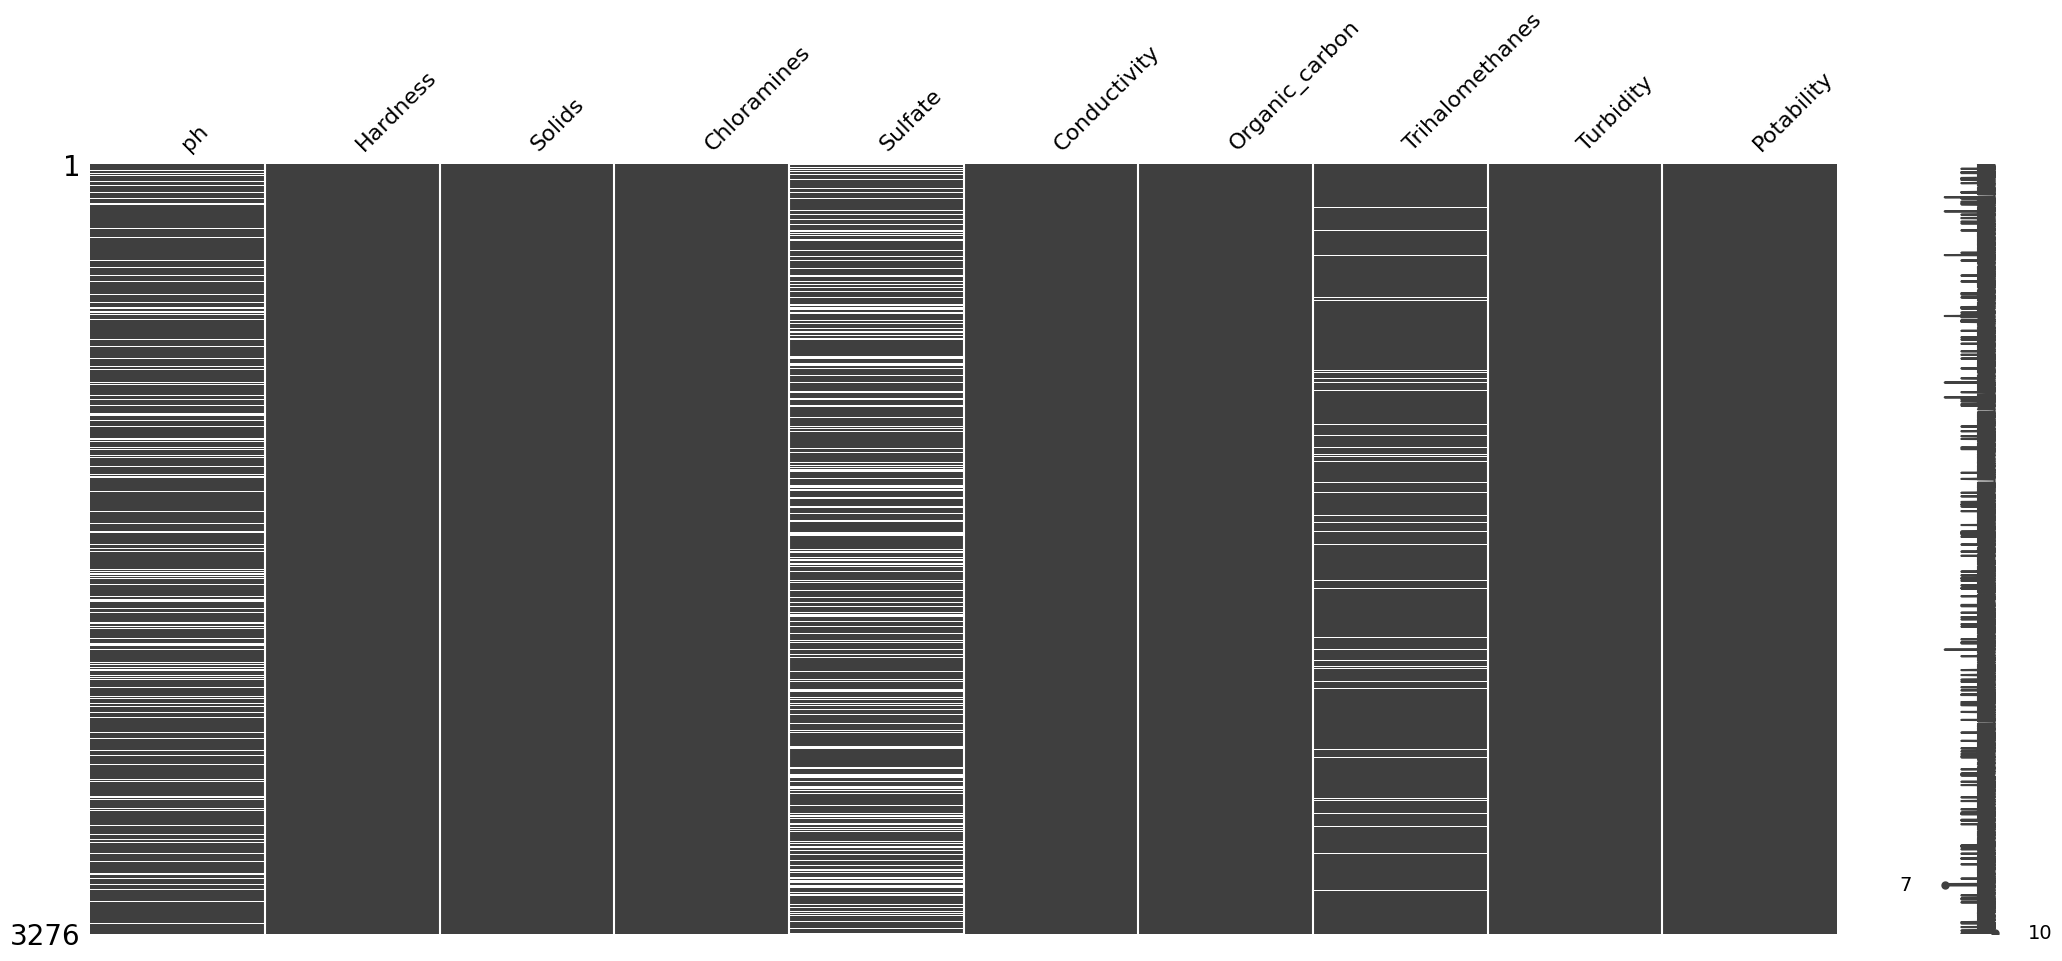

In [126]:
import missingno as msno
msno.matrix(df)
plt.show()

***Handling The Missing Values :***



Since the data has outliers in it , So filling the null values by the median might me a better option than filling by mean.

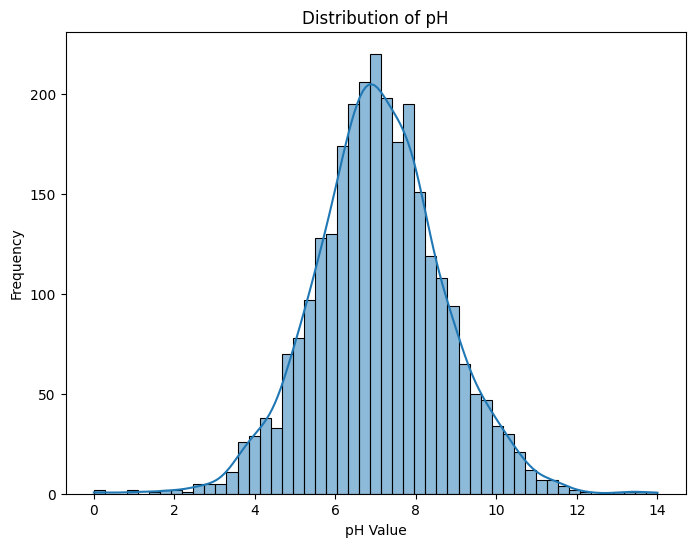

In [127]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ph'].dropna() , kde=True) 
plt.title('Distribution of pH')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.show()

***Fill The NUll Values By On Basis Of Potability (1 - 0) :***

In [128]:
df['ph'] = df.groupby('Potability')['ph'].apply(lambda x: x.fillna(x.mean())).reset_index(level=0, drop=True)
df['Sulfate'] = df.groupby('Potability')['Sulfate'].apply(lambda x: x.fillna(x.mean())).reset_index(level=0, drop=True)
df['Trihalomethanes'] = df.groupby('Potability')['Trihalomethanes'].apply(lambda x: x.fillna(x.mean())).reset_index(level=0, drop=True)


***2. PH Distribution***

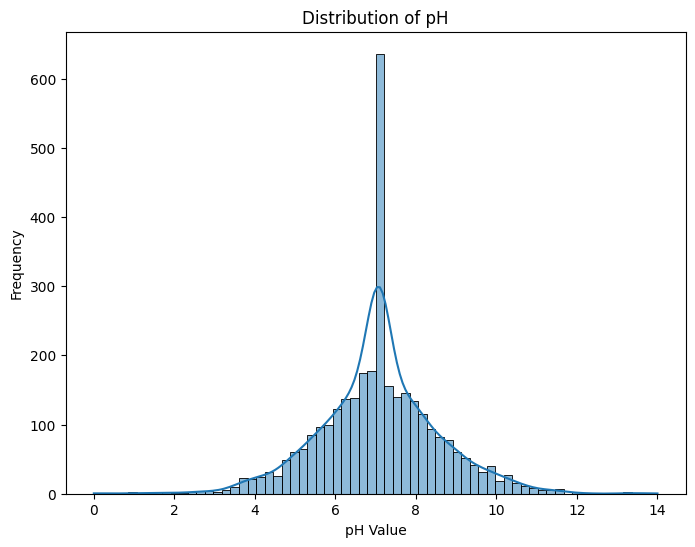

In [129]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ph'].dropna() , kde=True) 
plt.title('Distribution of pH')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.show()

***3. Hardness VS PH***

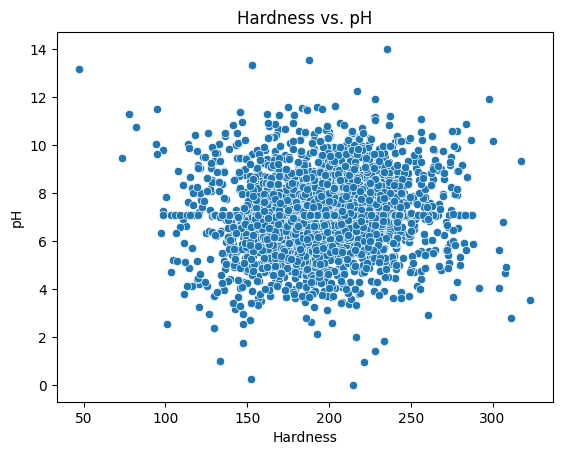

In [130]:
sns.scatterplot(x='Hardness', y='ph', data=df)
plt.title('Hardness vs. pH')
plt.xlabel('Hardness')
plt.ylabel('pH')
plt.show()


In [131]:
df.duplicated().sum()

np.int64(0)

In [132]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

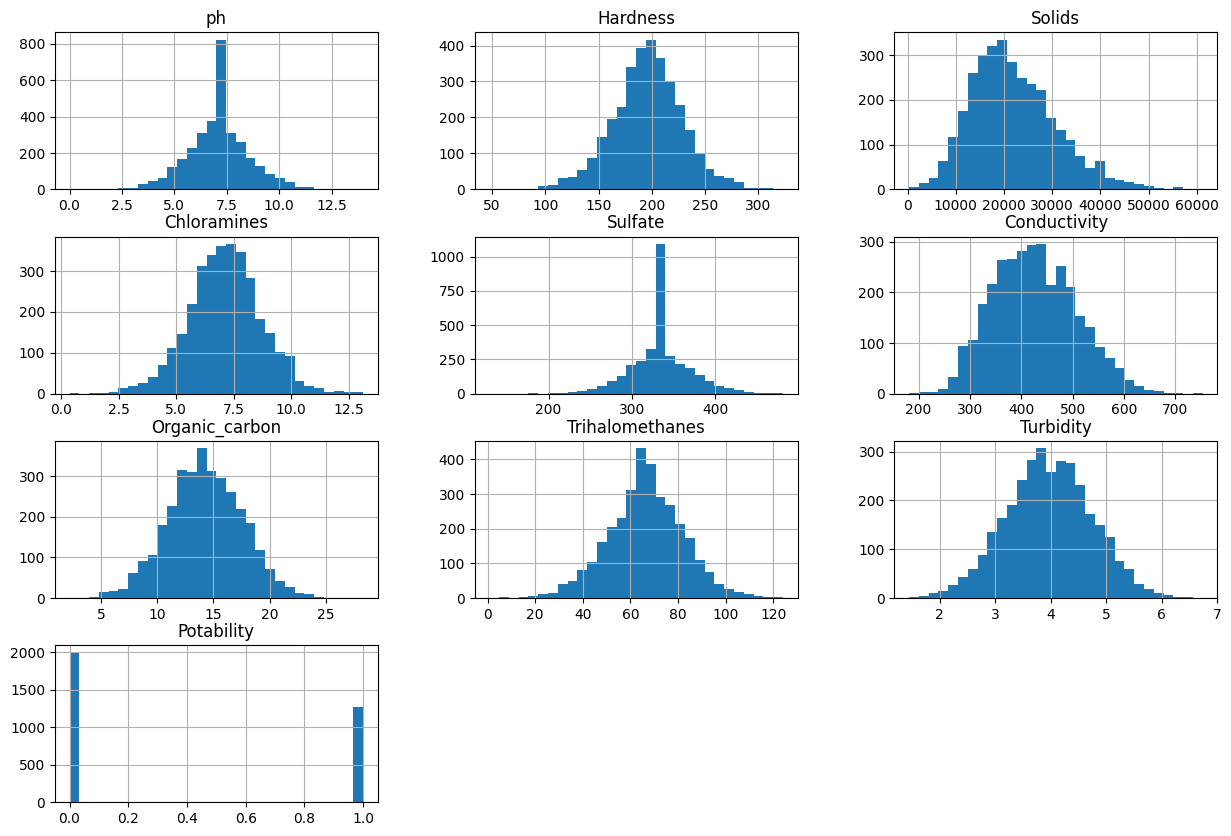

In [133]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [134]:
#sns.pairplot(df, hue="Potability", palette='coolwarm')
#plt.show()


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

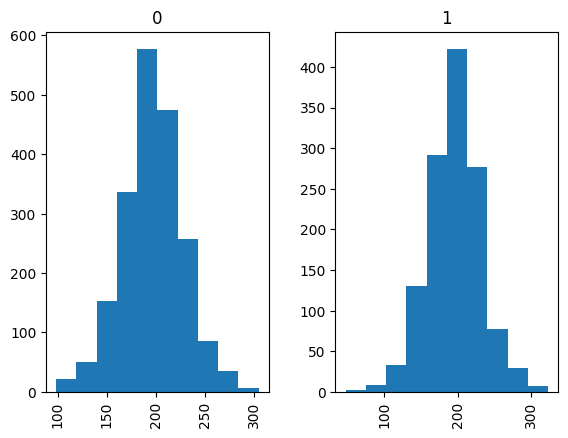

In [135]:

df.hist(column='Hardness', by='Potability')


Since the data has outliers in it , So filling the null values by the median might me a better option than filling by mean.

In [136]:

df["Hardness"] = df["Hardness"].fillna(df["Hardness"].median())
df["Solids"] = df["Solids"].fillna(df["Solids"].median())
df["Chloramines"] = df["Chloramines"].fillna(df["Chloramines"].median())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].median())
df["Conductivity"] = df["Conductivity"].fillna(df["Conductivity"].median())
df["Organic_carbon"] = df["Organic_carbon"].fillna(df["Organic_carbon"].median())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].median())
df["Turbidity"] = df["Turbidity"].fillna(df["Turbidity"].median())

In [137]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [138]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


***Handling The Outliers***

In [139]:
def capOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    #capp the outlier value
    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    
    return data


***Plotting The Columns Before Capping Outlieers :***

Removing the Outliers causes loss of original data for this Reason Capping the outliers is a best option .

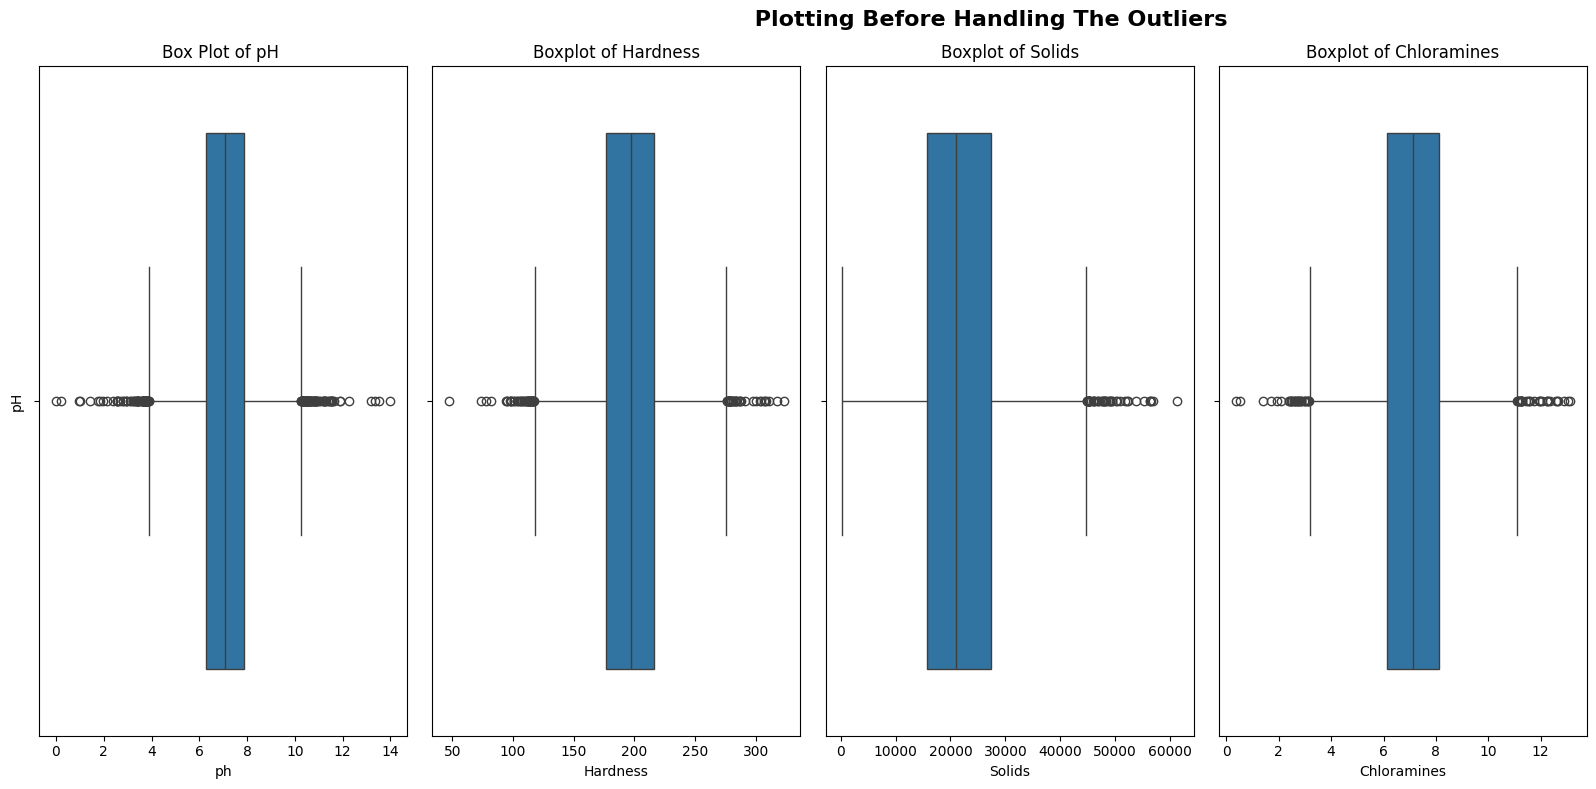

In [140]:
plt.figure(figsize=(20, 8))
plt.suptitle(" Plotting Before Handling The Outliers  " , fontsize=16 , fontweight='bold')

plt.subplot(1, 5, 1)
sns.boxplot(x=df["ph"])
plt.title('Box Plot of pH ')
plt.ylabel('pH')

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Hardness'])
plt.title('Boxplot of Hardness')

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Solids'])
plt.title('Boxplot of Solids')

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Chloramines'])
plt.title('Boxplot of Chloramines')

plt.tight_layout()
plt.show()


In [141]:
df = capOutliers(df, 'ph')


Capping All Others Columns Outliers:

In [142]:
df = capOutliers(df , "Hardness")

In [143]:
df = capOutliers(df , "Solids")

In [144]:
df = capOutliers(df , "Chloramines")

In [145]:
df = capOutliers(df , "Sulfate")

In [146]:
df = capOutliers(df , "Conductivity")

In [147]:
df = capOutliers(df , "Organic_carbon")

In [148]:
df = capOutliers(df , "Trihalomethanes")

In [149]:
df = capOutliers(df , "Turbidity")

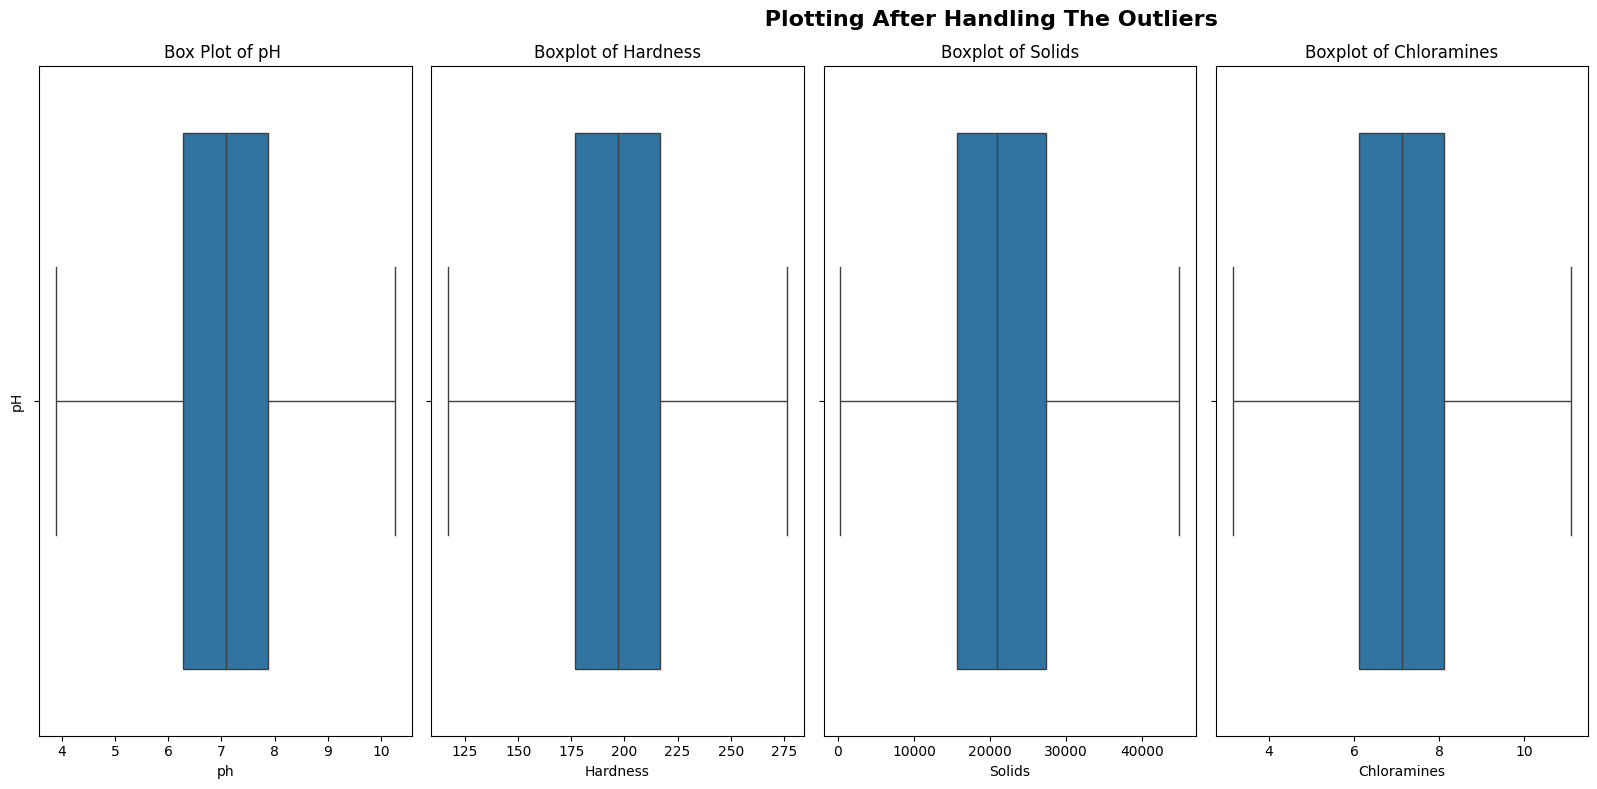

In [150]:
plt.figure(figsize=(20, 8))
plt.suptitle(" Plotting After Handling The Outliers  " , fontsize=16 , fontweight='bold')

plt.subplot(1, 5, 1)
sns.boxplot(x=df["ph"])
plt.title('Box Plot of pH ')
plt.ylabel('pH')

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Hardness'])
plt.title('Boxplot of Hardness')

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Solids'])
plt.title('Boxplot of Solids')

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Chloramines'])
plt.title('Boxplot of Chloramines')

plt.tight_layout()
plt.show()


***Distribution Plot For Each Column***

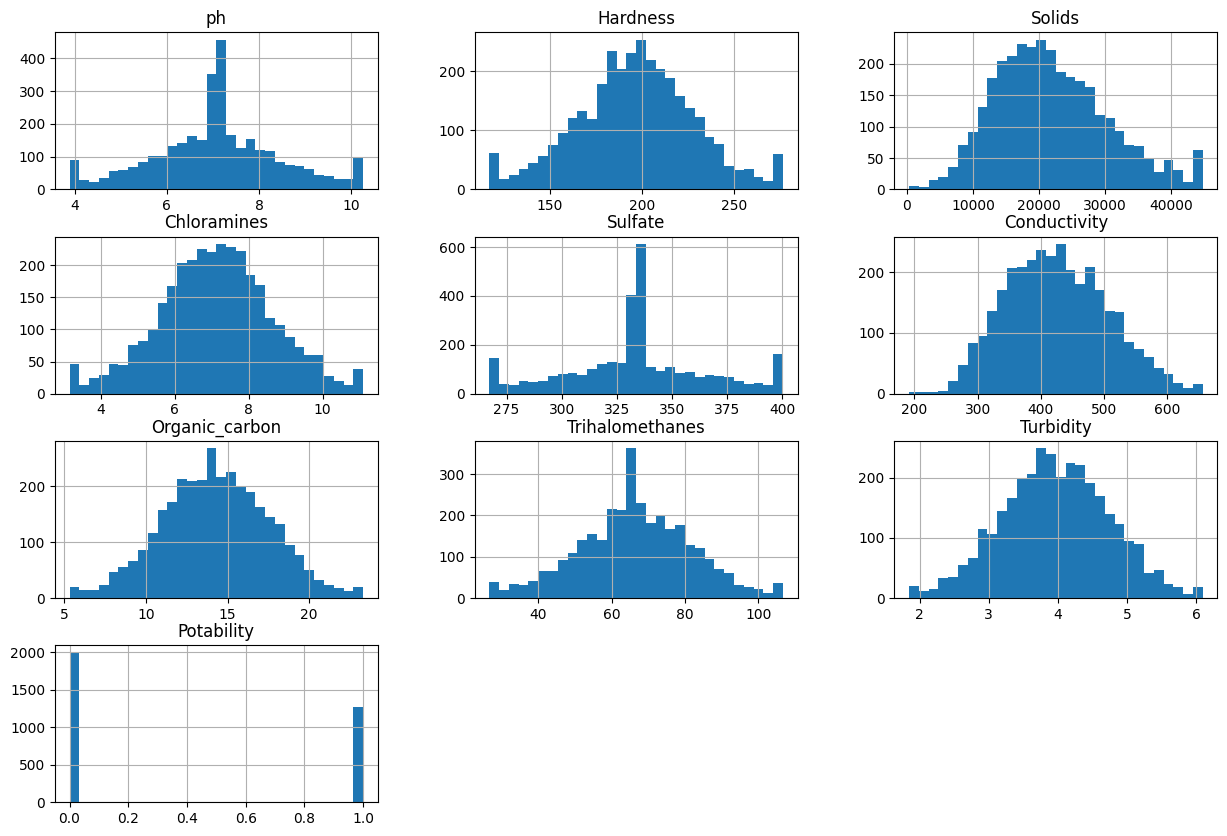

In [151]:
df.hist(bins=30, figsize=(15,10))
plt.show()


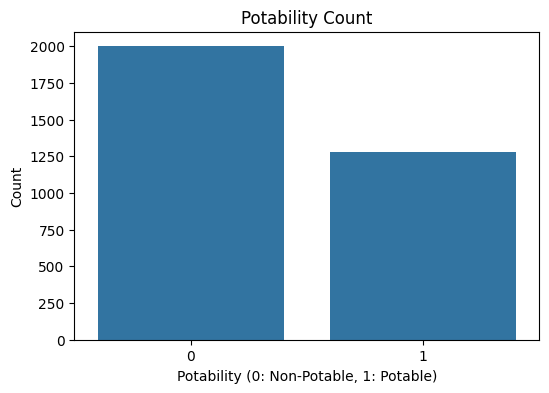

In [152]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title('Potability Count')
plt.xlabel('Potability (0: Non-Potable, 1: Potable)')
plt.ylabel('Count')
plt.show()

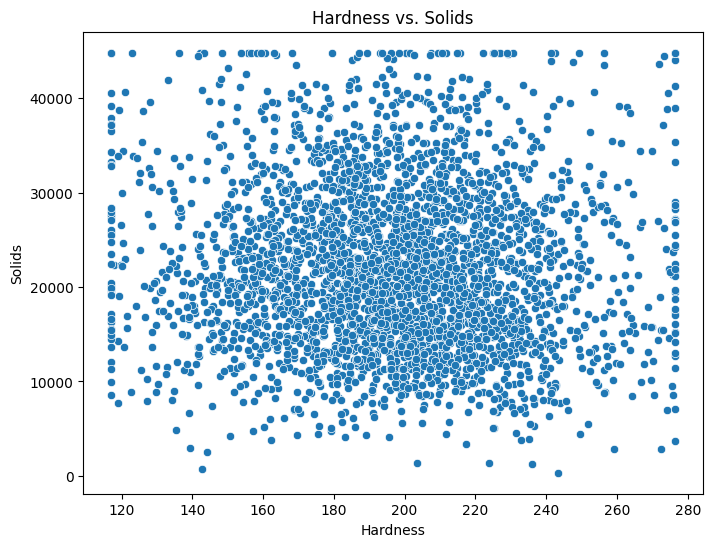

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hardness', y='Solids', data=df)
plt.title('Hardness vs. Solids')
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

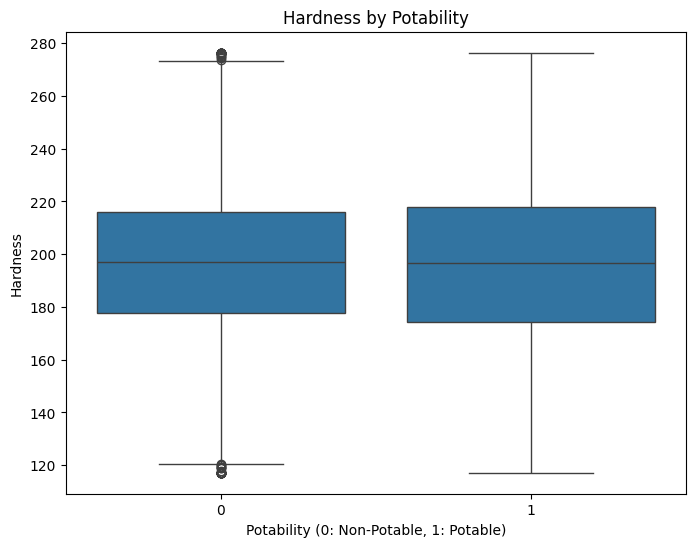

In [154]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='Hardness', data=df)
plt.title('Hardness by Potability')
plt.xlabel('Potability (0: Non-Potable, 1: Potable)')
plt.ylabel('Hardness')
plt.show()

***corelation matrix***

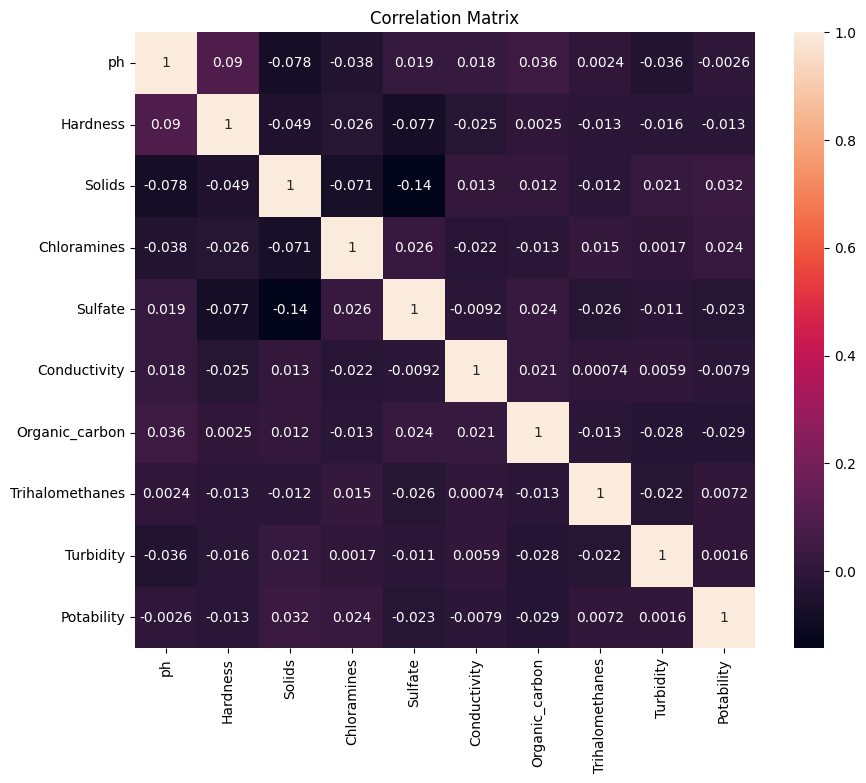

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


***Calculating & Plotting the mean of each Feature for each category(Potable & Non-Potable)***

In [156]:
grouped_data = df.groupby('Potability').agg({
    'Hardness': 'mean',
    'Solids': 'mean',
    'Chloramines': 'mean',
    'Sulfate': 'mean',
    'Conductivity': 'mean'
})



<Axes: xlabel='Potability'>

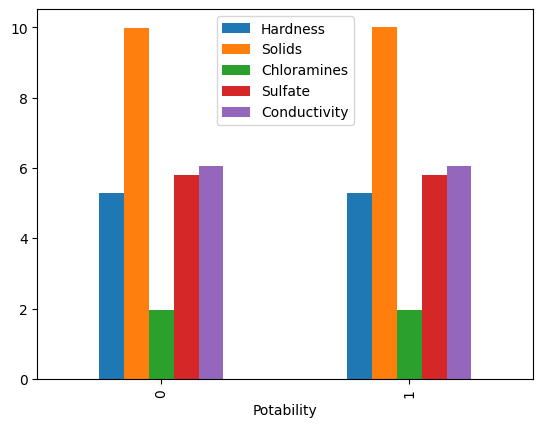

In [157]:
log_grouped_data = np.log(grouped_data)
log_grouped_data.plot(kind='bar')

***Grouping Data***

Grouping Data And applying Aggregation Function.


In [158]:
grouped_data = df.groupby('Potability').agg({
    'Hardness': ['mean' , 'max' , 'min'],
    'Solids': ['mean' , 'max' , 'min'] , 
    'Chloramines': ['mean' , 'max' , 'min'],
    'Sulfate': ['mean' , 'max' , 'min'],
    'Conductivity': ['mean' , 'max' , 'min']
})
grouped_data

Hardness                               Solids                \
                  mean         max        min          mean           max   
Potability                                                                  
0           196.734462  276.392834  117.12516  21738.283429  44831.869873   
1           195.857685  276.392834  117.12516  22299.224786  44831.869873   

                       Chloramines                          Sulfate  \
                   min        mean        max       min        mean   
Potability                                                            
0           320.942611    7.092748  11.096086  3.146221  334.379306   
1           728.750830    7.167203  11.096086  3.146221  332.889260   

                                  Conductivity                         
                   max        min         mean        max         min  
Potability                                                             
0           400.322434  267.15796   426.637682  655.87914  191.647579  
1           400.322434  267.15796   425.336233  655.87914  201.619737

***Plotting The Aggregated Function For Each Feature :***

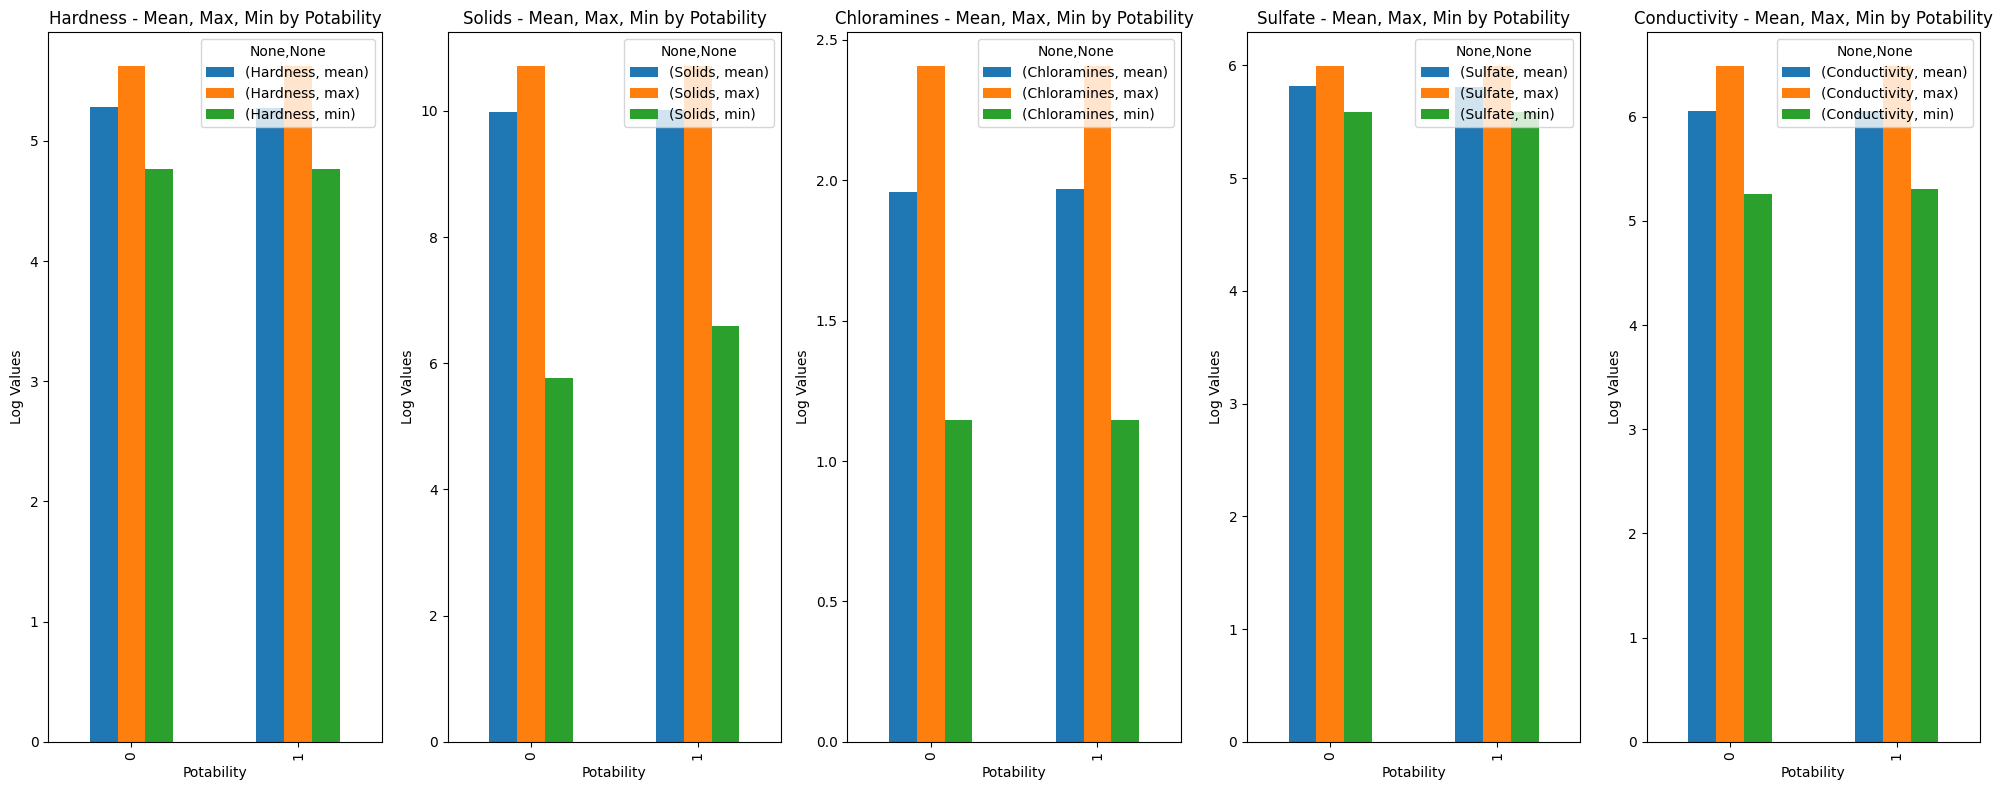

In [159]:

plt.figure(figsize=(20, 8))

plt.subplot(1, 5, 1)
grouped_data = df.groupby('Potability').agg({
    'Hardness': ['mean', 'max', 'min']
})
grouped_data_log = np.log(grouped_data)
grouped_data_log.plot(kind='bar', ax=plt.gca())
plt.title('Hardness - Mean, Max, Min by Potability')
plt.xlabel('Potability')
plt.ylabel('Log Values')

plt.subplot(1, 5, 2)
grouped_data = df.groupby('Potability').agg({
    'Solids': ['mean', 'max', 'min']
})
grouped_data_log = np.log(grouped_data)
grouped_data_log.plot(kind='bar', ax=plt.gca())
plt.title('Solids - Mean, Max, Min by Potability')
plt.xlabel('Potability')
plt.ylabel('Log Values')

plt.subplot(1, 5, 3)
grouped_data = df.groupby('Potability').agg({
    'Chloramines': ['mean', 'max', 'min']
})
grouped_data_log = np.log(grouped_data)
grouped_data_log.plot(kind='bar', ax=plt.gca())
plt.title('Chloramines - Mean, Max, Min by Potability')
plt.xlabel('Potability')
plt.ylabel('Log Values')

plt.subplot(1, 5, 4)
grouped_data = df.groupby('Potability').agg({
    'Sulfate': ['mean', 'max', 'min']
})
grouped_data_log = np.log(grouped_data)
grouped_data_log.plot(kind='bar', ax=plt.gca())
plt.title('Sulfate - Mean, Max, Min by Potability')
plt.xlabel('Potability')
plt.ylabel('Log Values')

plt.subplot(1, 5, 5)
grouped_data = df.groupby('Potability').agg({
    'Conductivity': ['mean', 'max', 'min']
})
grouped_data_log = np.log(grouped_data)
grouped_data_log.plot(kind='bar', ax=plt.gca())
plt.title('Conductivity - Mean, Max, Min by Potability')
plt.xlabel('Potability')
plt.ylabel('Log Values')

plt.tight_layout()
plt.show()


***Feature Engineering :***


In [160]:
df["hardness_ph_interaction"] = df["Hardness"] * df["ph"]
df['hardness_Chloramines_Interaction'] = df['Hardness'] * df['Chloramines']
df['hardness_Chloramines_Sum'] = df['Hardness'] + df['Chloramines']
df['hardness_Chloramines_Difference'] = df['Hardness'] - df['Chloramines']

In [161]:
df['ph_category'] = df['ph'].apply(lambda x: 'acidic' if x < 6.9 else ('neutral' if 6.9 <= x <= 7.1 else 'basic'))
df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,hardness_ph_interaction,hardness_Chloramines_Interaction,hardness_Chloramines_Sum,hardness_Chloramines_Difference,ph_category
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1451.726415,1495.743736,212.190667,197.590244,neutral
1,3.889107,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,503.339581,858.752901,136.058166,122.787675,acidic


***Categorical Analysis :***

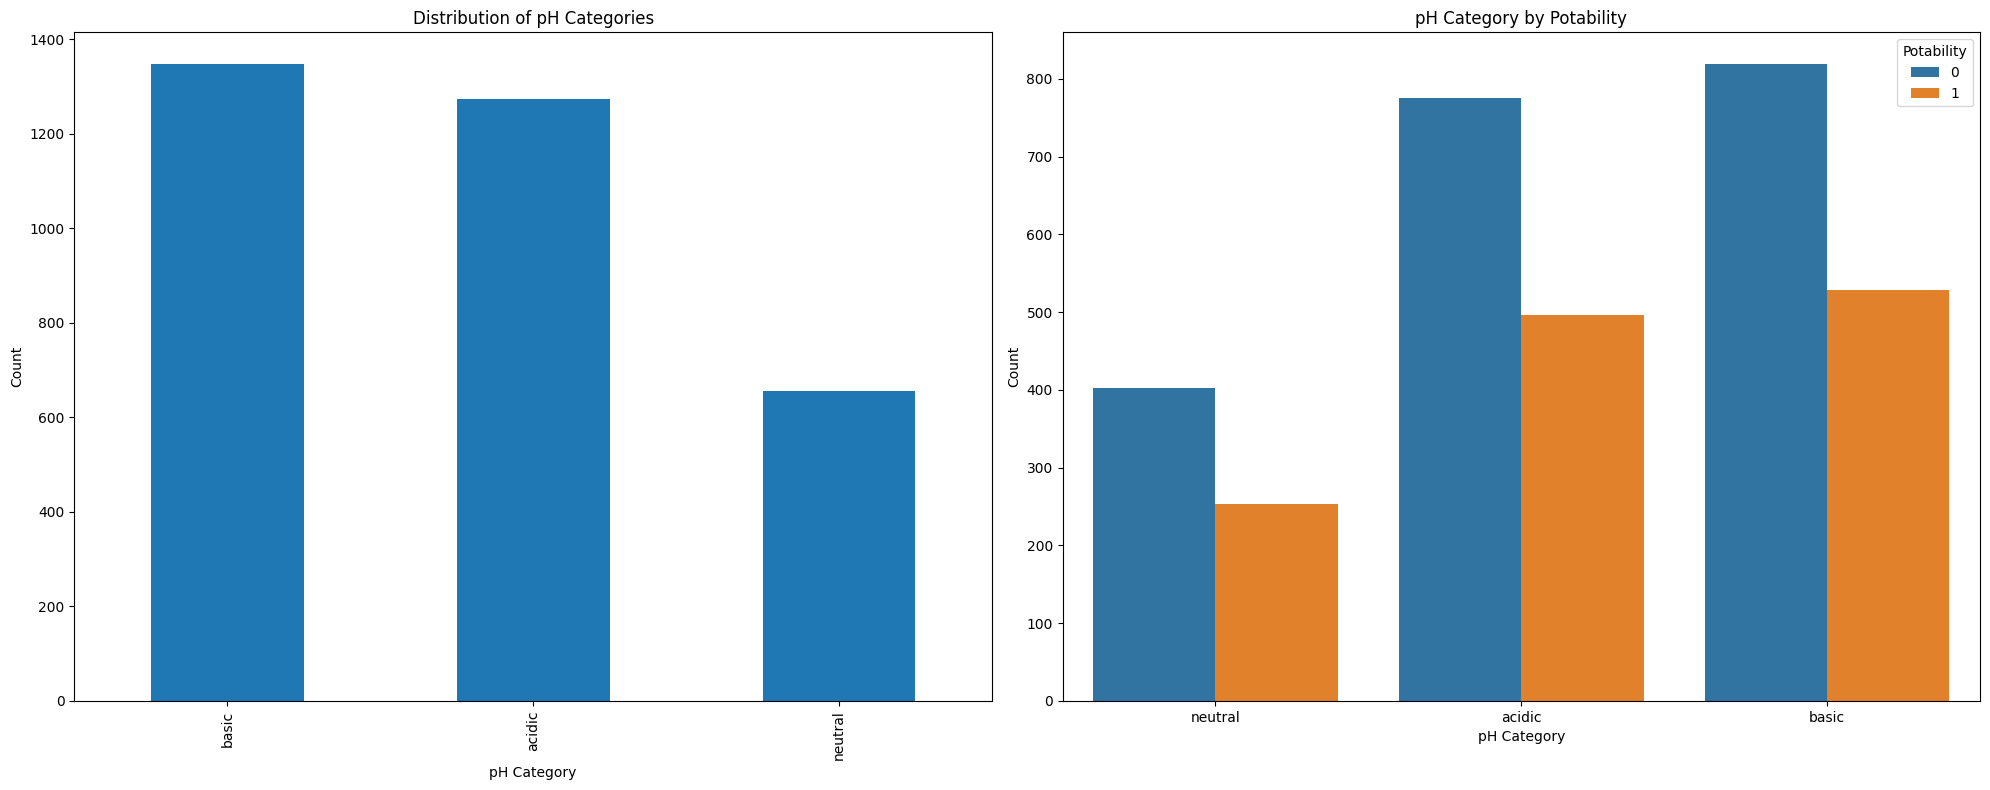

In [162]:
plt.figure(figsize=(20, 8))

plt.subplot(1 , 2 , 1)
ax = df["ph_category"].value_counts().plot(kind="bar")

plt.title('Distribution of pH Categories')
plt.xlabel('pH Category')
plt.ylabel('Count')

plt.subplot(1 ,2 ,2)
sns.countplot(x='ph_category', hue='Potability', data=df)
plt.title('pH Category by Potability')
plt.xlabel('pH Category')
plt.ylabel('Count')

plt.tight_layout() 
plt.show()

In [163]:

df = df.join(pd.get_dummies(df["ph_category"], drop_first=True, dtype=int))
df = df.drop("ph_category", axis=1)


***Splitting The Data Into Train Test :***

In [164]:
X = df.drop(columns=['Potability'])
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Scaling The Data :***

In [165]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [167]:
y_pred = model.predict(X_test_scaled)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest model Accuracy : " , accuracy * 100)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest model Accuracy :  81.25
[[382  30]
 [ 93 151]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       412
           1       0.83      0.62      0.71       244

    accuracy                           0.81       656
   macro avg       0.82      0.77      0.79       656
weighted avg       0.82      0.81      0.81       656



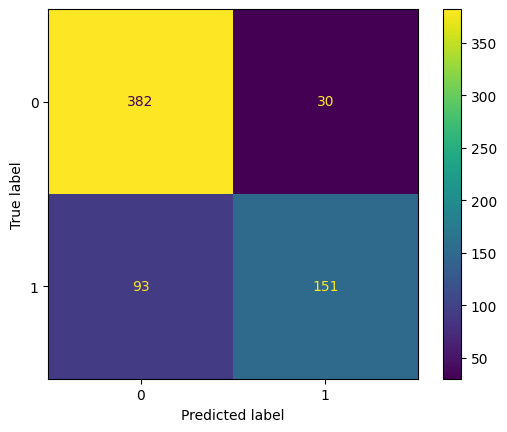

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


[0.12259537 0.053125   0.06536148 0.05905849 0.21724227 0.05524458
 0.05658339 0.05535922 0.05411088 0.06629844 0.05627681 0.05553853
 0.05383183 0.01204841 0.0173253 ]


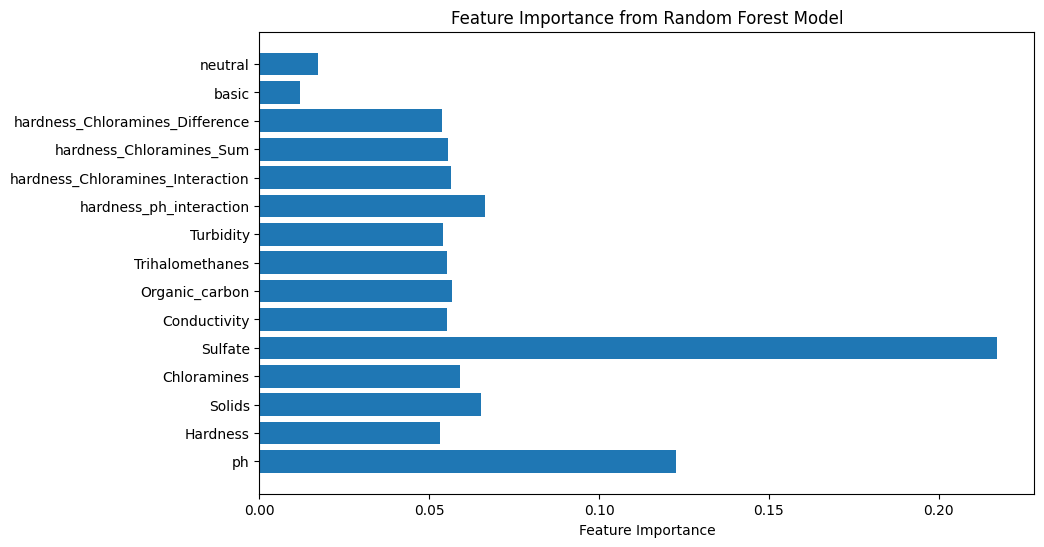

In [171]:
feature_importances = model.feature_importances_
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.show()

***Saving The MOdel Using Joblib:***

In [172]:
import joblib

joblib.dump(model, 'water_potability_model.pkl')



['water_potability_model.pkl']

In [173]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [175]:
from sklearn.linear_model import LogisticRegression

# Create the model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg * 100)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 63.41463414634146
Confusion Matrix:
[[408   4]
 [236   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       412
           1       0.67      0.03      0.06       244

    accuracy                           0.63       656
   macro avg       0.65      0.51      0.42       656
weighted avg       0.65      0.63      0.51       656

